Tratamento do Dataset

In [37]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [15]:
unique_counts = data.nunique()
unique_counts # valores unicos para cada coluna
# data.head()
# data.tail()
#data.shape #(3207, 12)
data.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [16]:
data['transmission'].unique()

array(['5-Speed A/T', 'A/T', 'CVT Transmission', '6-Speed A/T',
       '4-Speed A/T', 'Automatic', '5-Speed M/T',
       'Transmission w/Dual Shift Mode', '7-Speed A/T', '1-Speed A/T',
       '1-Speed Automatic', '6-Speed M/T', '10-Speed Automatic',
       '8-Speed A/T', '8-Speed Automatic', '6-Speed Automatic',
       '10-Speed A/T', '9-Speed A/T', 'Automatic CVT',
       '9-Speed Automatic', 'M/T', '7-Speed M/T', 'Variable',
       '6-Speed Automatic with Auto-Shift',
       '7-Speed Automatic with Auto-Shift', '4-Speed Automatic', '2',
       '7-Speed DCT Automatic', '6-Speed Manual', '5-Speed Automatic',
       '–', 'Automatic, 8-Spd', '8-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O',
       'Transmission Overdrive Switch', 'SCHEDULED FOR OR IN PRODUCTION',
       'Single-Speed Fixed Gear',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes',
       '7-Speed Automatic', 'Automatic, 9-Spd 9G-Tronic',
       'Autom

In [9]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Tipo_Combustivel
0,Jeep,Wrangler Sport,2014,"71,000 mi.",Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000,285.0,3.6,6,Gasoline Fuel
1,Toyota,Highlander XLE,2015,"68,575 mi.",Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000,270.0,3.5,6,Gasoline Fuel
2,Toyota,Camry Hybrid XLE,2018,"69,641 mi.",Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995,208.0,2.5,4,Electric
3,Subaru,Outback Touring XT,2021,"33,500 mi.",Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000,260.0,2.4,4,Gasoline Fuel
4,Lexus,GX 460 Base,2018,"75,000 mi.",Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095,301.0,4.6,8,Gasoline Fuel


In [3]:
data.info() #milage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3207 non-null   object
 1   model         3207 non-null   object
 2   model_year    3207 non-null   int64 
 3   milage        3207 non-null   object
 4   fuel_type     3060 non-null   object
 5   engine        3207 non-null   object
 6   transmission  3207 non-null   object
 7   ext_col       3207 non-null   object
 8   int_col       3207 non-null   object
 9   accident      3118 non-null   object
 10  clean_title   2740 non-null   object
 11  price         3207 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 300.8+ KB


In [5]:
data.describe()

,model_year,price
count,3207.000000,3.207000e+03
mean,2015.517930,4.487024e+04
std,6.131963,8.382969e+04
min,1974.000000,2.000000e+03
25%,2012.000000,1.705000e+04
50%,2017.000000,3.169800e+04
75%,2020.000000,4.999650e+04
max,2024.000000,2.954083e+06


In [2]:
#modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

1974 2024


#### correção: 'milage' -> INT

In [38]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [39]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

#### NULL's

In [4]:
data.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       147
engine            0
transmission      0
ext_col           0
int_col           0
accident         89
clean_title     467
price             0
dtype: int64

#### utilizar algoritmo de arvore de decisão para preencher esses valores?

#### counts

In [3]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os valores nulos só podem ser nan (ou não se sabe)??
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].value_counts() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
data['ext_col'].value_counts()# 11 -> nao se sabe
data['int_col'].value_counts() # 98 -> nao se sabe
for preco in data['price']: # tudo certo
    if not isinstance(preco, int):
        print('erro')

In [5]:
data['fuel_type'].unique()

array(['Gasoline', 'Hybrid', nan, 'Diesel', 'E85 Flex Fuel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [6]:
data.loc[data['fuel_type'] == '–']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
120,Mazda,Mazda6 i Grand Touring,2016,"83,100 mi.",–,–,A/T,White,White,None reported,Yes,17800
143,Chevrolet,Sonic LT,2013,"110,000 mi.",–,–,A/T,Gray,Black,None reported,Yes,7500
621,Porsche,911 Carrera Cabriolet,1996,"38,000 mi.",–,–,Transmission w/Dual Shift Mode,Blue,Gray,NaN,NaN,75000
655,Mazda,Protege DX,1993,"94,200 mi.",–,–,A/T,Gray,–,At least 1 accident or damage reported,Yes,2500
714,Chrysler,Pacifica Touring,2017,"87,305 mi.",–,–,9-Speed A/T,Silver,Black,None reported,Yes,9000
773,Dodge,Ram 3500 Quad Cab DRW,2000,"188,000 mi.",–,–,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,10000
846,Volvo,850 Turbo,1995,"94,000 mi.",–,–,A/T,White,Black,None reported,Yes,4500
864,Nissan,300ZX Base,1993,"168,000 mi.",–,–,5-Speed M/T,White,Black,None reported,Yes,7000
949,Jeep,Wrangler S,1994,"50,750 mi.",–,–,5-Speed M/T,Blue,Gray,None reported,Yes,15000
964,Chrysler,200 Limited,2017,"100,600 mi.",–,–,A/T,Black,Black,None reported,Yes,10000


In [13]:
len(data['brand'].unique())

56

In [108]:
data.describe()

,model_year,milage,price
count,3207.000000,3207.000000,3.207000e+03
mean,2015.517930,64594.983785,4.487024e+04
std,6.131963,52387.260707,8.382969e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,23151.500000,1.705000e+04
50%,2017.000000,52253.000000,3.169800e+04
75%,2020.000000,93450.000000,4.999650e+04
max,2024.000000,405000.000000,2.954083e+06


### gráficos

#### BOXPLOT

model_year       Axes(0.125,0.11;0.227941x0.77)
milage        Axes(0.398529,0.11;0.227941x0.77)
price         Axes(0.672059,0.11;0.227941x0.77)
dtype: object

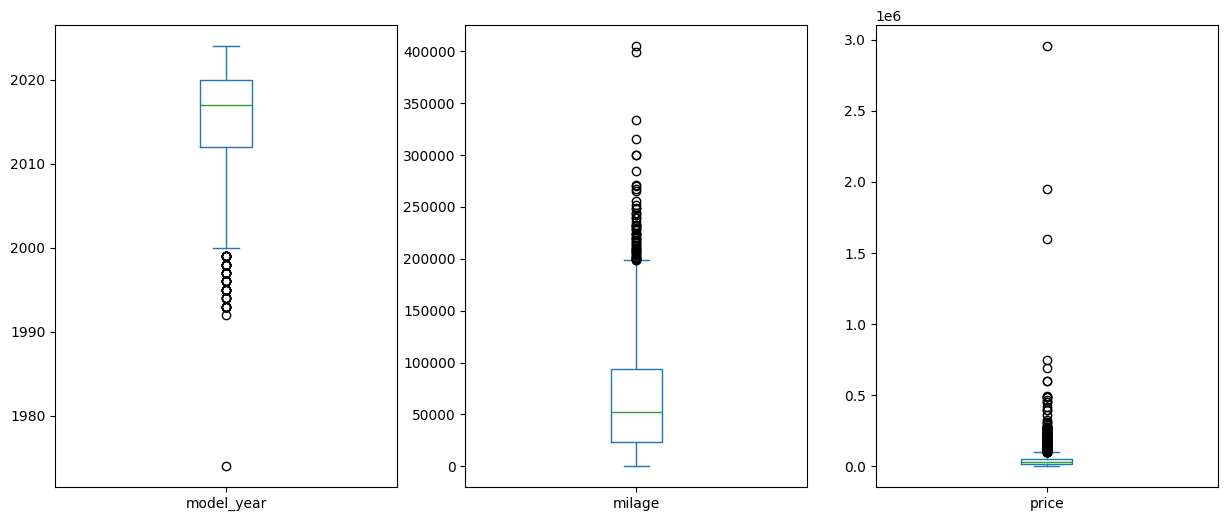

In [12]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [114]:
data[data['model_year']<1990] # outlier do 1º gráfico
data[data['milage']>350000] # outlier do 2º gráfico
data[data['price']>1500000] # 3º


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1650,Bugatti,Veyron 16.4 Grand Sport,2011,6330,Gasoline,8.0L W16 64V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,White,White,None reported,Yes,1950995
2484,Maserati,Quattroporte Base,2005,32000,Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Red,Beige,At least 1 accident or damage reported,Yes,2954083
2564,Porsche,Carrera GT Base,2005,4400,Gasoline,605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,None reported,Yes,1599000


#### BARPLOT

C:\Users\elisa\AppData\Local\Temp\ipykernel_5892\3331264911.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\elisa\AppData\Local\Temp\ipykernel_5892\3331264911.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\elisa\AppData\Local\Temp\ipykernel_5892\3331264911.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\elisa\AppData\Local\Temp\ipykernel_5892\3331264911.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

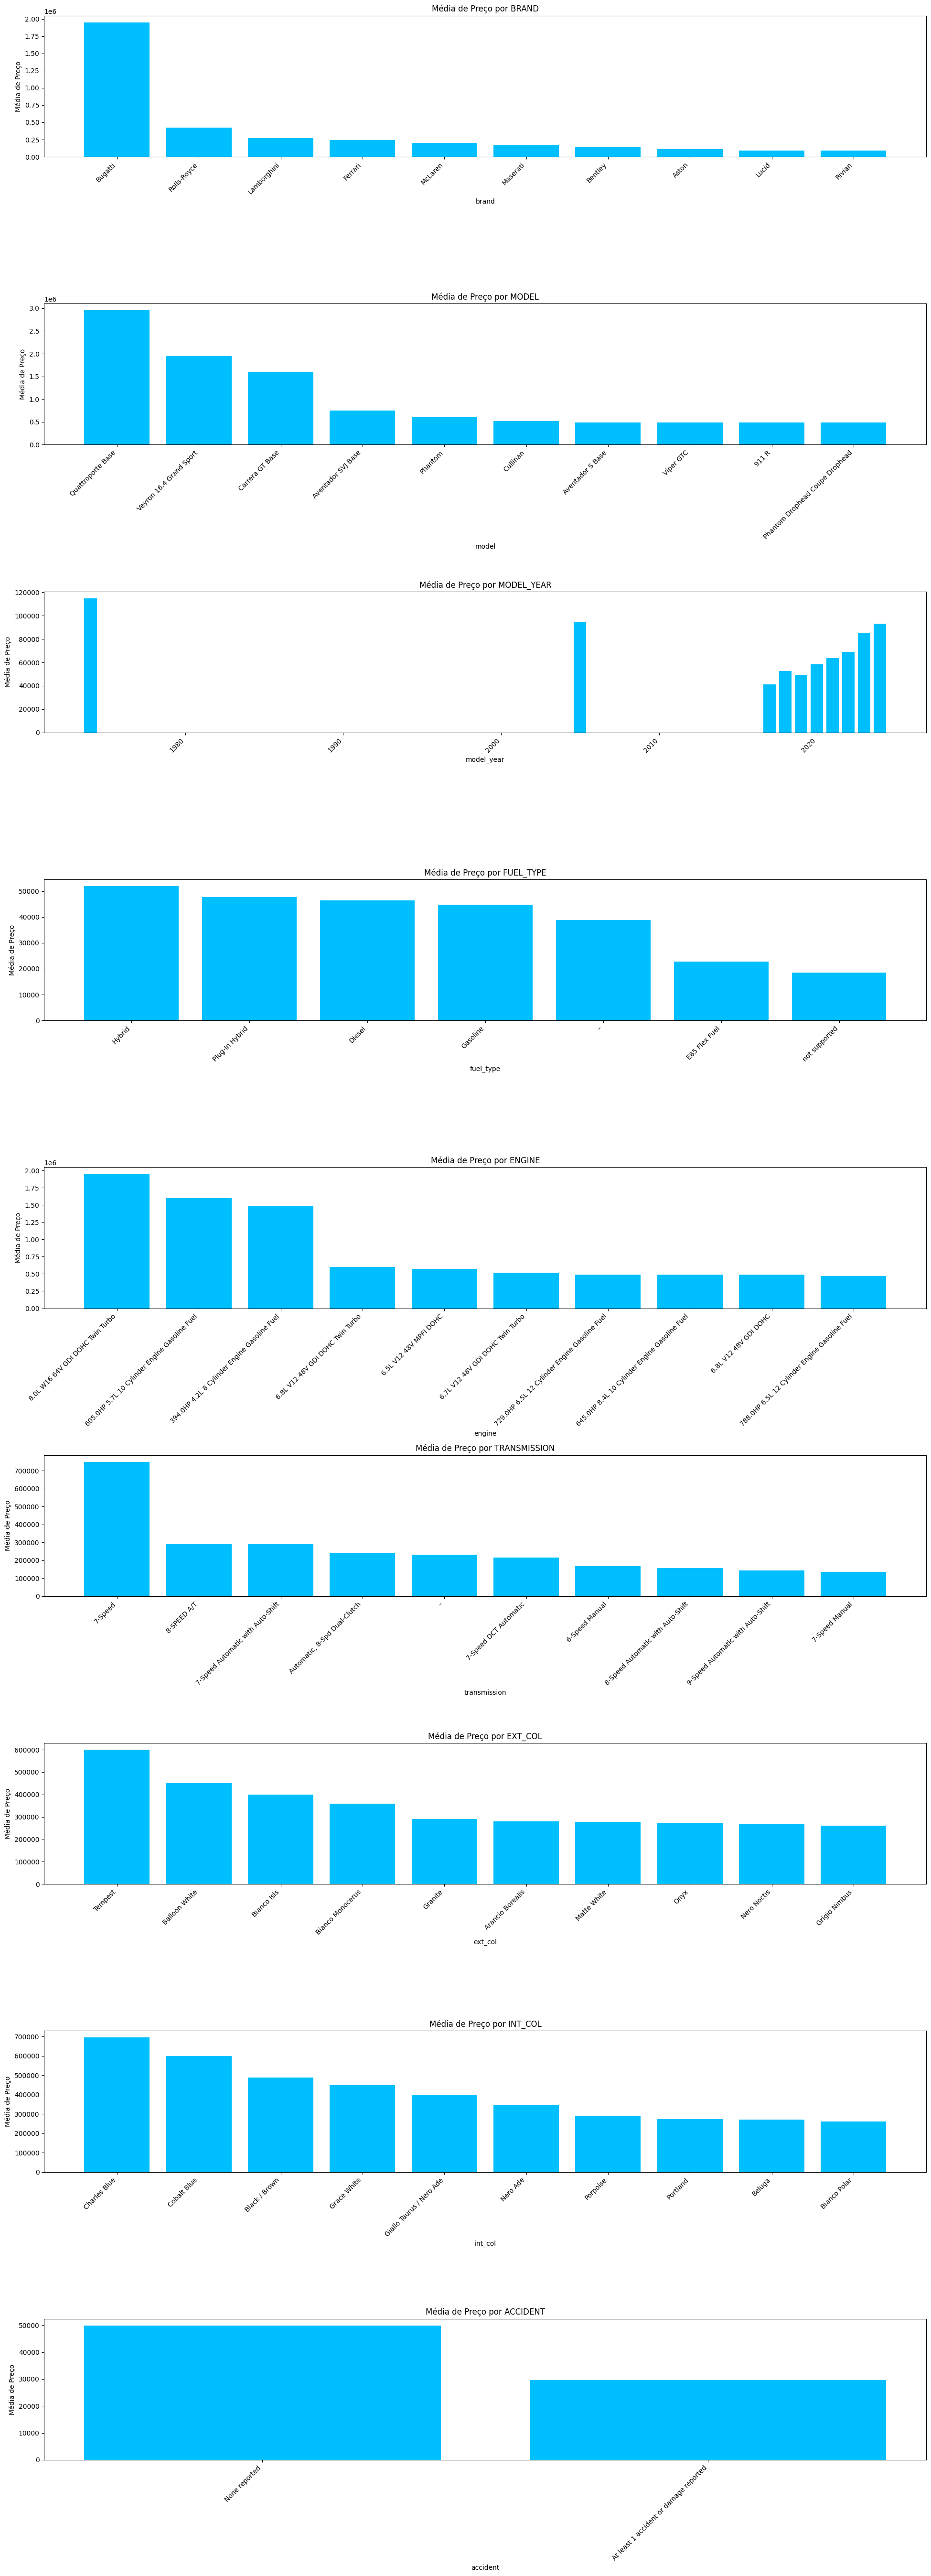

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'df' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)

# Lista para armazenar os gráficos gerados
colunas = ['brand',	'model', 'model_year',	'fuel_type',	'engine',	'transmission',	'ext_col',	'int_col',	'accident',	'clean_title']	
fig, axs = plt.subplots(len(colunas) - 1, 1, figsize=(10, 5 * (len(colunas) - 1)))

# Iterar sobre as colunas do DataFrame (exceto a última)
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)

    # Plotar o gráfico de barras para a média do preço por valor
    axs[i].bar(top.index, top.values, color='deepskyblue')

    axs[i].set_title(f'Média de Preço por {column.upper()}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Média de Preço')

    # axs[i].set_xticklabels([str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in med.index], rotation=45)


    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 2, 1.3])

plt.show()

#### SCATTER

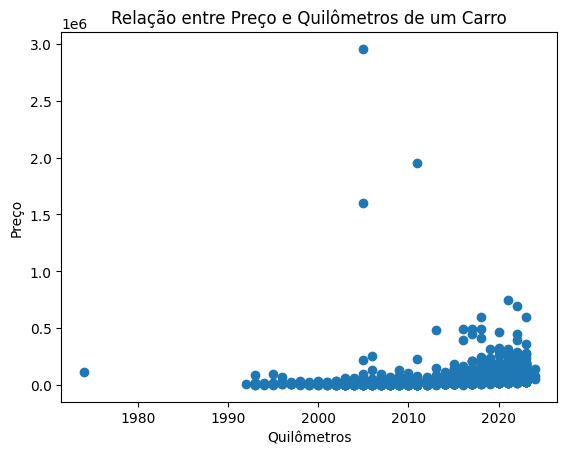

In [17]:
# Plotar um gráfico de dispersão
plt.scatter(data['model_year'], data['price'])

# Adicionar rótulos e título
plt.xlabel('Quilômetros')
plt.ylabel('Preço')
plt.title('Relação entre Preço e Quilômetros de um Carro')

# Exibir o gráfico
plt.show()

#### LINEPLOT

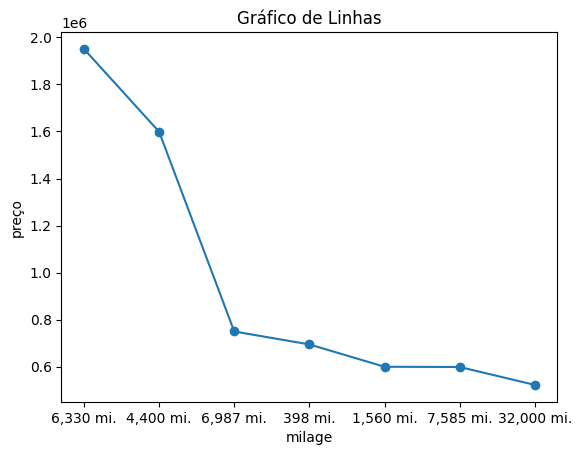

In [10]:
d = data.groupby('milage')['price'].mean().sort_values(ascending=False)
d = d.head(7)
plt.plot(d.index, d.values, marker='o', linestyle='-')

# Adicionar rótulos e título
plt.xlabel('milage')
plt.ylabel('preço')
plt.title('Gráfico de Linhas')

# Exibir o gráfico
plt.show()

#### o preço diminui a medida que o nº de quilometros aumenta

In [11]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

                          count          mean            std        min  \
brand         model_year                                                  
Acura         1993          1.0  9.020000e+04            NaN    90200.0   
              1995          1.0  1.099900e+04            NaN    10999.0   
              1998          1.0  5.500000e+03            NaN     5500.0   
              2003          1.0  4.000000e+03            NaN     4000.0   
              2005          3.0  6.499667e+03    1509.503340     4900.0   
              2006          1.0  1.499000e+04            NaN    14990.0   
              2007          1.0  7.700000e+03            NaN     7700.0   
              2008          1.0  1.000000e+04            NaN    10000.0   
              2010          2.0  1.144400e+04    3456.337946     9000.0   
              2011          2.0  8.750000e+03    4596.194078     5500.0   
              2012          1.0  1.900000e+04            NaN    19000.0   
              2013       

#### [ENGINE] novos atributos 

In [40]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

# data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')


In [41]:
data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             3207 non-null   object 
 1   model             3207 non-null   object 
 2   model_year        3207 non-null   int64  
 3   milage            3207 non-null   int64  
 4   fuel_type         3060 non-null   object 
 5   engine            3207 non-null   object 
 6   transmission      3207 non-null   object 
 7   ext_col           3207 non-null   object 
 8   int_col           3207 non-null   object 
 9   accident          3118 non-null   object 
 10  clean_title       2740 non-null   object 
 11  price             3207 non-null   int64  
 12  Potencia          2578 non-null   float64
 13  Capacidade_Motor  3020 non-null   float64
 14  Numero_Cilindros  2851 non-null   float64
 15  Numero_Valvulas   396 non-null    float64
dtypes: float64(4), int64(3), object(9)
memory 

In [46]:
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

In [20]:
d=data[data['Potencia'].isnull()]
d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head()

,engine,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas
7,5.0L V8 32V PDI DOHC,NaN,5.0,8.0,32.0
11,3.0 Liter Turbo,NaN,3.0,NaN,NaN
17,4.0L V8 32V GDI DOHC Twin Turbo,NaN,4.0,8.0,32.0
19,3.5L V6 24V GDI SOHC,NaN,3.5,6.0,24.0
26,6.8L V12 48V GDI DOHC Twin Turbo,NaN,6.8,12.0,48.0


preencher NULLS com média ou assim ?

#### BARPLOT

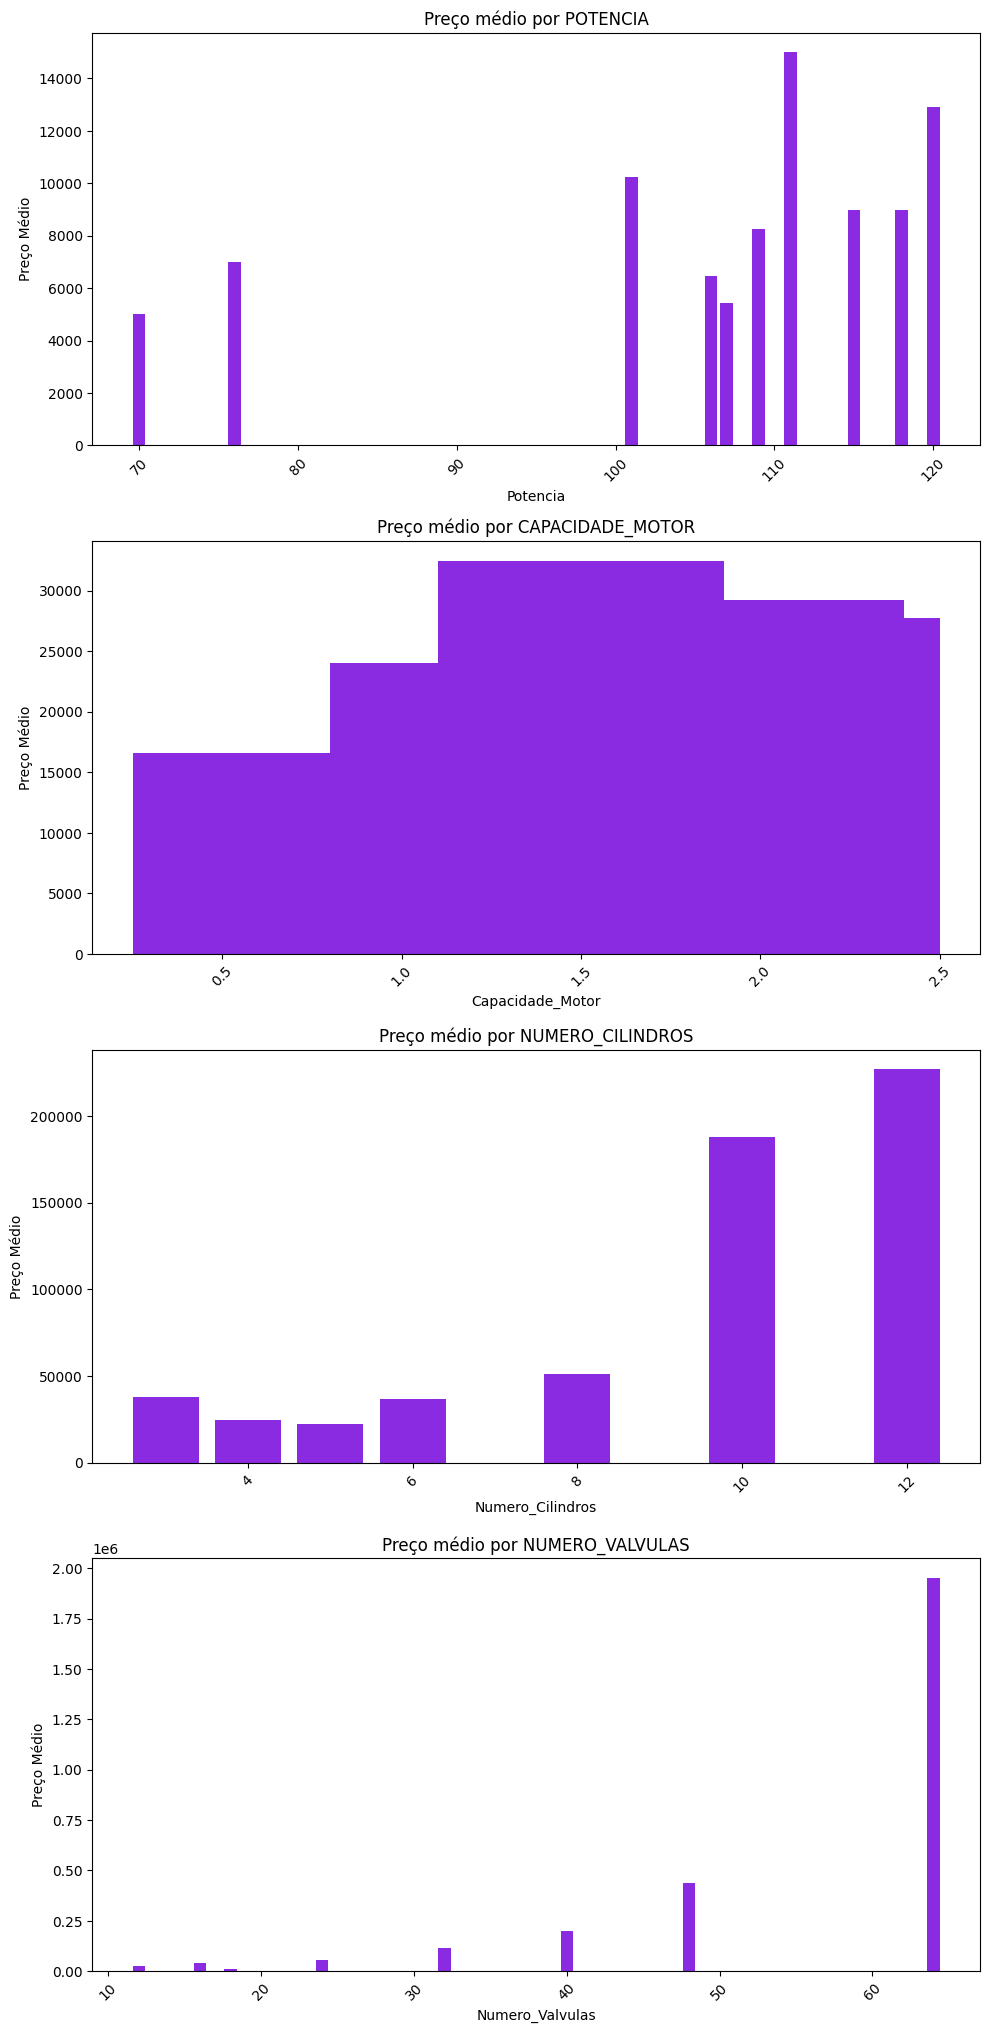

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'price']
fig, axs = plt.subplots(len(columns), 1, figsize=(10, 5 * len(columns)))

# Iterating over the columns of the DataFrame
for i, column in enumerate(columns[:-1]):  # Skip the last column
    # Calculate the mean price for each unique value in the column
    med = data.groupby(column)['price'].mean().head(10)

    # Plot the bar chart for the mean price per value
    axs[i].bar(med.index, med.values, color='blueviolet')

    axs[i].set_title(f'Preço médio por {column.upper()}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Preço Médio')
    axs[i].tick_params(axis='x', rotation=45)  # Adjust rotation of x-axis labels

# Remove the empty subplot for the last column
fig.delaxes(axs[-1])

# Adjust the layout to avoid overlapping
plt.tight_layout()

plt.show()


In [ ]:
# data.loc[data['Numero_Valvulas'] == 32]

In [34]:
data['Numero_Valvulas'].unique()

array([ nan,  32.,  24.,  48.,  16.,  12.,  40., 697.,  18.,  64.])

In [27]:
data['Numero_Cilindros'].unique()

array([ 6.,  4.,  8., 10., nan, 12.,  3.,  5.])

In [28]:
data['Capacidade_Motor'].unique()

array(['3.6', '3.5', '2.5', '2.4', '4.6', '2.3', '5.0', '1.6', '6.8',
       '3.0', '2.0', nan, '4.0', '5.4', '3.7', '3.3', '5.7', '5.2',
       '0.65', '6.7', '3.8', '5.3', '6.2', '4.4', '5.6', '6.0', '4.7',
       '1.2', '2.9', '2.7', '3.9', '4.2', '5.8', '3.2', '6.4', '1.8',
       '4.3', '1.5', '5.5', '6.3', '4.8', '6.75', '7.0', '1.4', '3.4',
       '6.5', '2.2', '2.1', '2', '8.3', '6.6', '7.3', '2.8', '6.1', '4',
       '8.1', '3', '4.5', '5.9', '7.4', '1.3', '1.0', '8.0', '6', '8.4',
       '5'], dtype=object)

In [ ]:
sorted(data['Potencia'].unique())